Cтворити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

In [15]:
import keras as k
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import fashion_mnist

In [29]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [31]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28)),
    k.layers.Dense(64, activation = 'relu'),
    k.layers.Dense(10)
])

In [32]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(0.001),
    metrics=[k.metrics.SparseCategoricalAccuracy()],
)

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2544 - sparse_categorical_accuracy: 0.9048 - val_loss: 0.3767 - val_sparse_categorical_accuracy: 0.8654
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2475 - sparse_categorical_accuracy: 0.9077 - val_loss: 0.3533 - val_sparse_categorical_accuracy: 0.8738
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2416 - sparse_categorical_accuracy: 0.9093 - val_loss: 0.3572 - val_sparse_categorical_accuracy: 0.8707
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2389 - sparse_categorical_accuracy: 0.9103 - val_loss: 0.3620 - val_sparse_categorical_accuracy: 0.8771
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2290 - sparse_categorical_accuracy: 0.9153 - val_loss: 0.3672 - val_sparse_categorical_accuracy: 0.8755
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.3790 - val_sparse_categorical_accuracy:

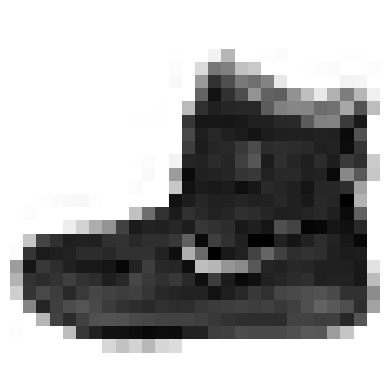

In [36]:
img_size = 28
plt.imshow(x_train[0].reshape(img_size, img_size), cmap = 'gray_r')
plt.axis('off')
plt.show()